In [1]:
import os
import sys
from glob import glob
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import defaultdict
from utils import label_map_util
from utils import visualization_utils as vis_util
import random

%matplotlib inline

In [2]:
def load_graph(graph_file):
    """Loads a frozen inference graph"""
    graph = tf.Graph()
    with graph.as_default():
        od_graph_def = tf.GraphDef()
        with tf.gfile.GFile(graph_file, 'rb') as fid:
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')
    return graph


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

In [3]:
## SSD Inception V2 Coco Model - real data - 20000 steps
PATH_TO_GRAPH = r'models/ssd_inception_v2_coco_2017_11_17/real/frozen_inference_graph.pb' ## load SSD trained on udacity's parking lot images
PATH_TO_LABELS = r'data/udacity_label_map.pbtxt'
NUM_CLASSES = 4

In [4]:
detection_graph = load_graph(PATH_TO_GRAPH)

In [5]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{1: {'id': 1, 'name': 'Green'}, 2: {'id': 2, 'name': 'Red'}, 3: {'id': 3, 'name': 'Yellow'}, 4: {'id': 4, 'name': 'off'}}


In [6]:
IMAGE_SIZE = (12, 8)

SCORES
[0.981293   0.00437531 0.00424186 0.00420591 0.00418109 0.0040499
 0.00399212 0.00390464 0.00388905 0.00388561]
CLASSES
[1. 1. 4. 4. 1. 1. 4. 4. 3. 1.]


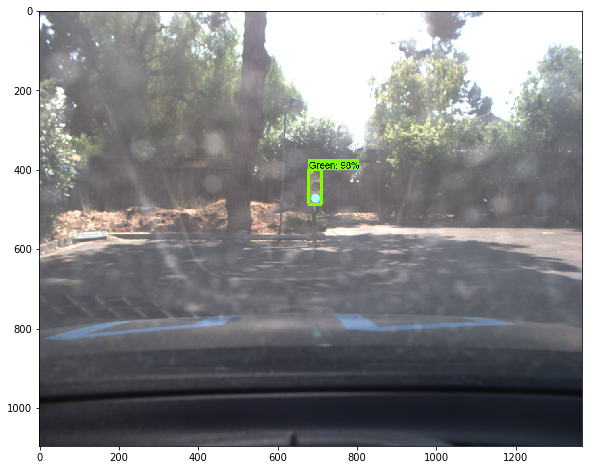

SCORES
[0.98209274 0.00826882 0.00544752 0.0051472  0.00507174 0.00501537
 0.00499045 0.00480483 0.00478371 0.00469073]
CLASSES
[2. 1. 3. 2. 3. 4. 3. 3. 4. 1.]


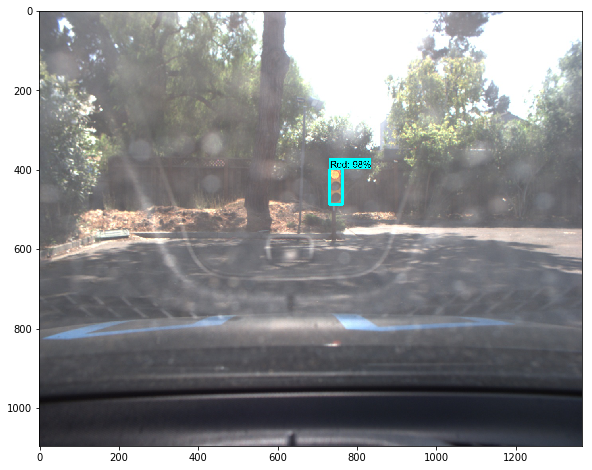

SCORES
[0.9939766  0.00712259 0.00602639 0.00576333 0.00526154 0.00520737
 0.00504343 0.00487894 0.0048453  0.00481643]
CLASSES
[2. 2. 4. 1. 1. 4. 4. 4. 1. 1.]


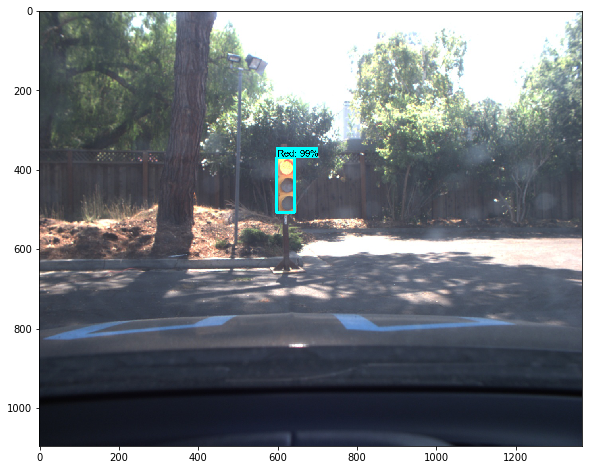

SCORES
[0.503297   0.01643661 0.00548367 0.00519437 0.00452496 0.00447538
 0.00441261 0.00436527 0.00434848 0.00434191]
CLASSES
[1. 1. 4. 4. 4. 1. 1. 1. 4. 4.]


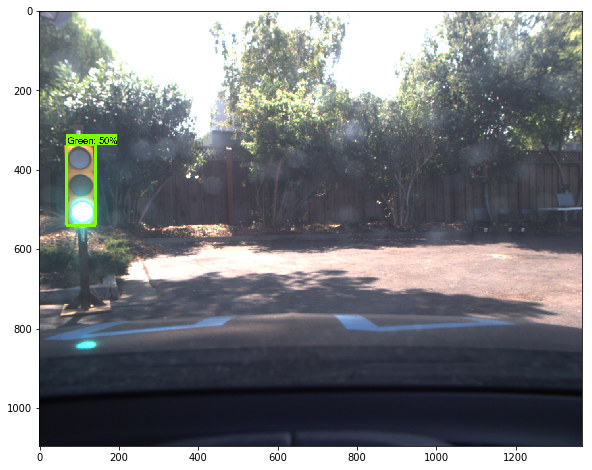

SCORES
[0.9900662  0.00489312 0.00482725 0.00458807 0.00426024 0.00403566
 0.00393557 0.00388648 0.00378558 0.00375376]
CLASSES
[1. 4. 2. 4. 4. 4. 1. 1. 1. 4.]


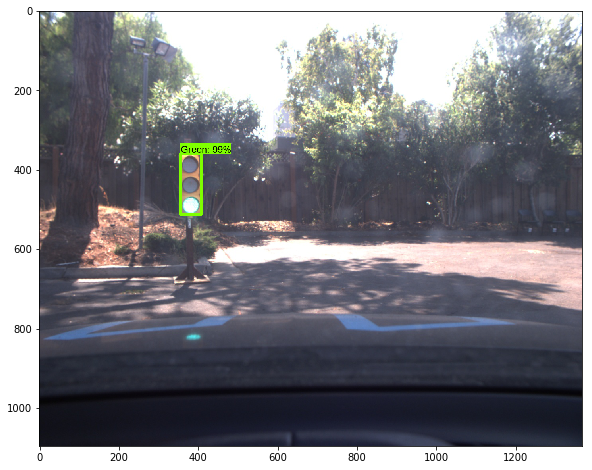

SCORES
[0.866133   0.06731606 0.02077629 0.00569544 0.00541644 0.00458546
 0.00443198 0.00440387 0.00426907 0.00421635]
CLASSES
[2. 3. 1. 3. 2. 1. 4. 2. 4. 2.]


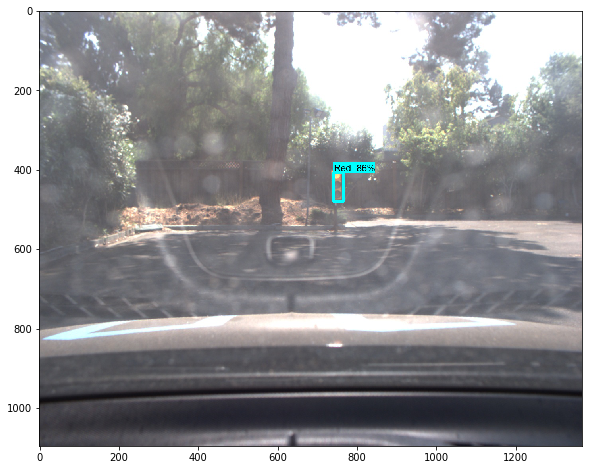

SCORES
[0.503297   0.01643661 0.00548367 0.00519437 0.00452496 0.00447538
 0.00441261 0.00436527 0.00434848 0.00434191]
CLASSES
[1. 1. 4. 4. 4. 1. 1. 1. 4. 4.]


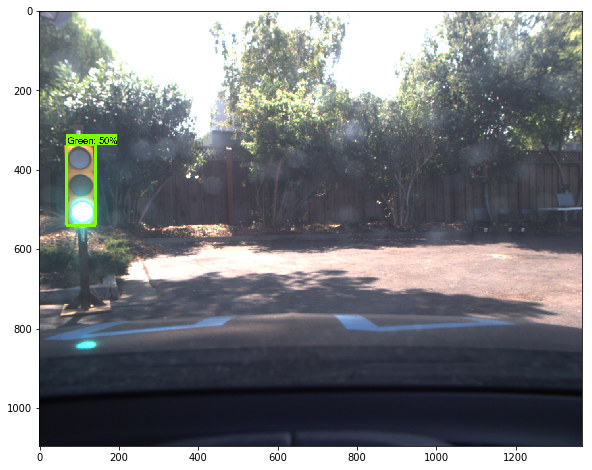

SCORES
[0.66184795 0.5857233  0.07043283 0.00641247 0.00519507 0.00420594
 0.0041923  0.00404731 0.00383166 0.00378133]
CLASSES
[3. 1. 2. 1. 3. 4. 2. 4. 4. 3.]


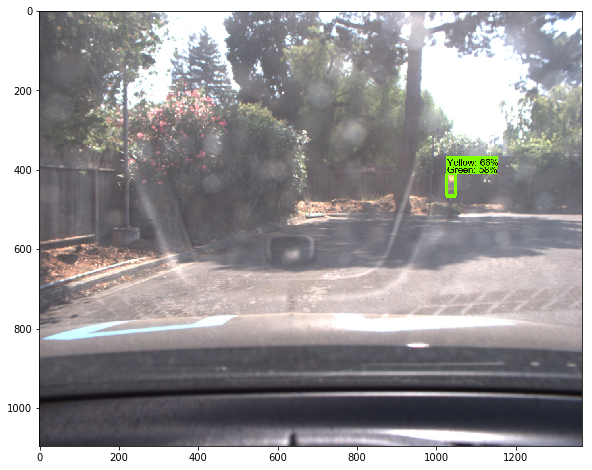

SCORES
[0.95938665 0.00545111 0.00463481 0.00428107 0.00410311 0.00384356
 0.00382319 0.00372505 0.00371209 0.00371176]
CLASSES
[1. 1. 4. 1. 1. 1. 4. 3. 1. 4.]


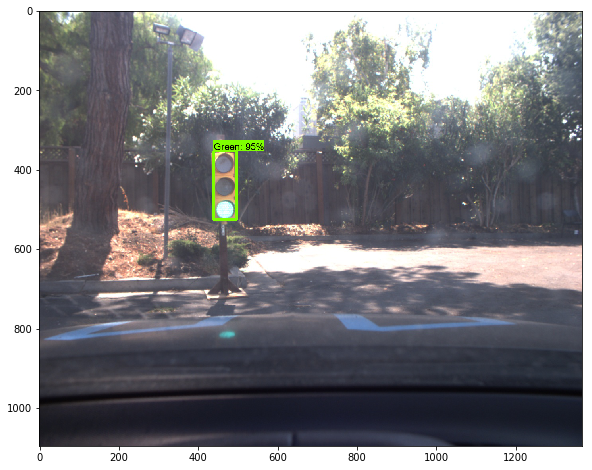

SCORES
[0.99719125 0.00553203 0.00530207 0.00516777 0.00453374 0.0044456
 0.00418168 0.00406238 0.0038647  0.00385322]
CLASSES
[2. 1. 4. 1. 3. 1. 4. 1. 4. 1.]


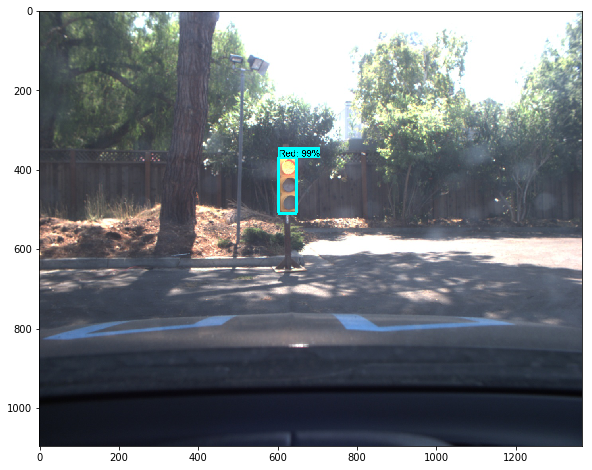

SCORES
[0.9899686  0.00645017 0.0051462  0.00456478 0.0043315  0.00415603
 0.00411654 0.00406491 0.00403784 0.00400046]
CLASSES
[1. 1. 4. 1. 3. 4. 2. 4. 1. 3.]


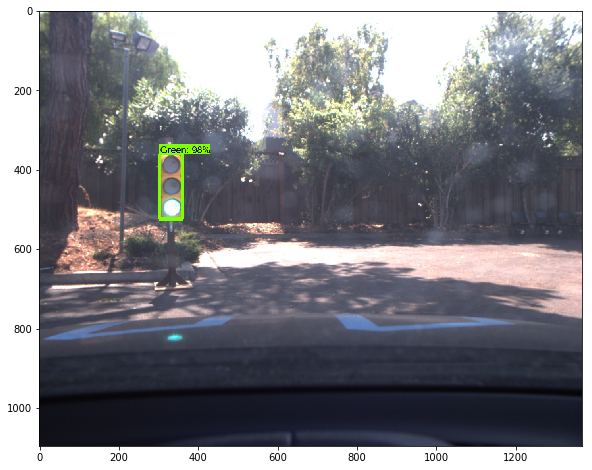

In [9]:
# Test on real data from udacity testing parking lot.
PATH_TO_IMGS = r'data/udacity_testarea_rgb'
TEST_IMGS = glob(os.path.join(PATH_TO_IMGS, r'*.jpg'))
random.shuffle(TEST_IMGS)

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detect_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detect_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detect_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMGS):
            random.shuffle(TEST_IMGS)
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            print('SCORES')
            print(scores[0])
            print('CLASSES')
            print(classes[0])
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                line_thickness=8)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()
            
            if idx == 10:
                break

In [10]:
# Model: SSD Inception V2 Coco on Udacity simulator data - 20000 steps
PATH_TO_GRAPH = r'models/ssd_inception_v2_coco_2017_11_17/sim/frozen_inference_graph.pb' ## load SSD trained on udacity's simulator images
detection_graph = load_graph(PATH_TO_GRAPH)

SCORES
[0.966703   0.91494185 0.03340842 0.00814077 0.00622724 0.00606802
 0.0056299  0.00553185 0.00538612 0.00537384]
CLASSES
[2. 2. 2. 2. 3. 1. 4. 1. 4. 2.]


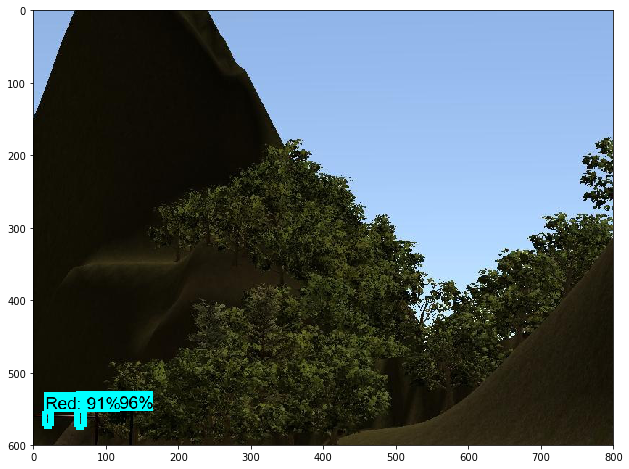

SCORES
[0.9704563  0.9147967  0.71222746 0.09431762 0.02952964 0.00619289
 0.00583912 0.00535442 0.0051734  0.00502193]
CLASSES
[2. 2. 2. 2. 2. 2. 2. 1. 3. 3.]


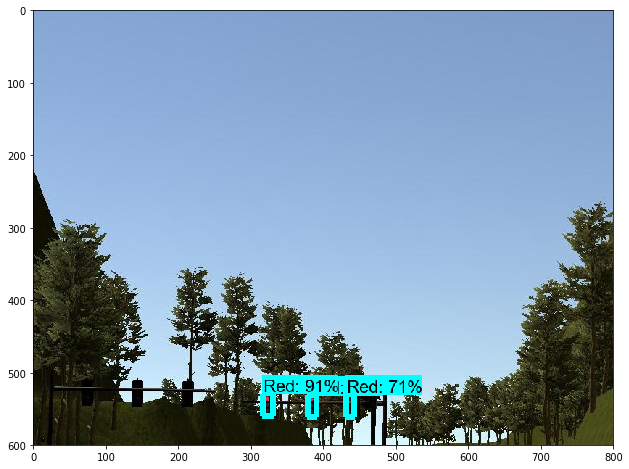

SCORES
[0.9910018  0.9856193  0.46165138 0.01103566 0.00891361 0.00709237
 0.00666273 0.00646615 0.00635865 0.00633676]
CLASSES
[1. 1. 1. 2. 2. 1. 1. 1. 4. 1.]


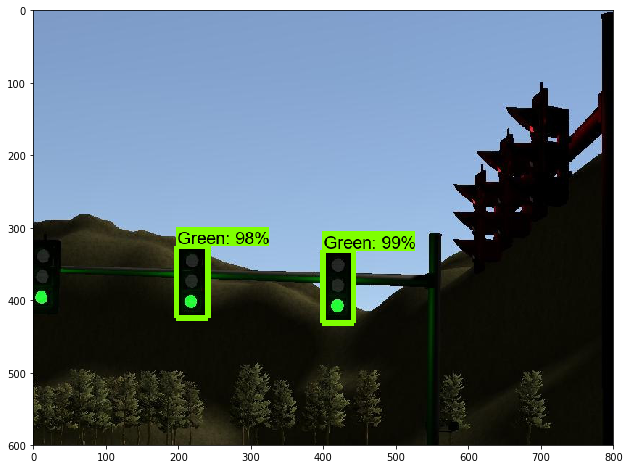

SCORES
[0.996416   0.98914194 0.96272355 0.00989177 0.00979332 0.0069682
 0.00606988 0.00585789 0.0057197  0.00571721]
CLASSES
[2. 2. 2. 1. 1. 2. 3. 3. 1. 2.]


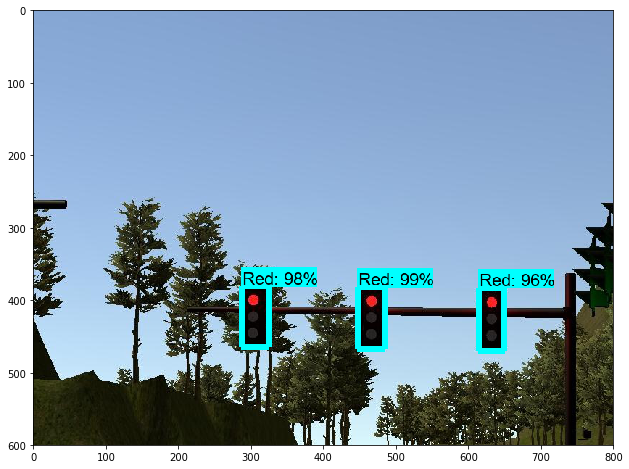

SCORES
[0.9953011  0.99519193 0.97076267 0.01663147 0.01574993 0.01145899
 0.00828373 0.00706358 0.00691427 0.00639356]
CLASSES
[1. 1. 1. 1. 1. 1. 1. 2. 4. 1.]


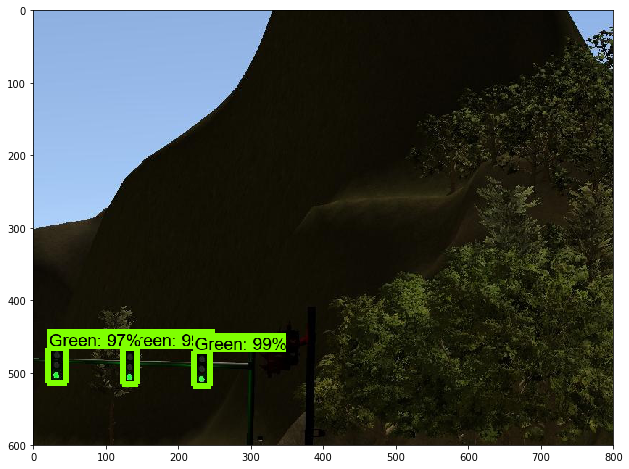

SCORES
[0.99270016 0.1487143  0.06867816 0.01359266 0.00809622 0.00745601
 0.00698167 0.00669157 0.00656858 0.00600874]
CLASSES
[2. 2. 2. 2. 3. 2. 3. 4. 3. 2.]


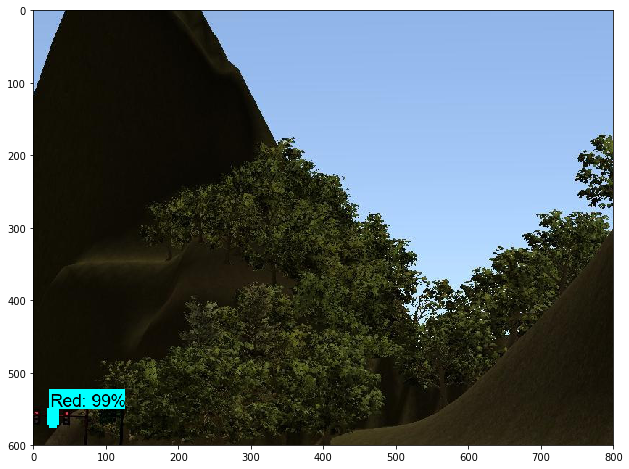

SCORES
[0.9904544  0.98194236 0.9701377  0.01068342 0.00828937 0.00826357
 0.00745783 0.00732238 0.00603514 0.00593138]
CLASSES
[2. 2. 2. 2. 2. 4. 2. 2. 4. 1.]


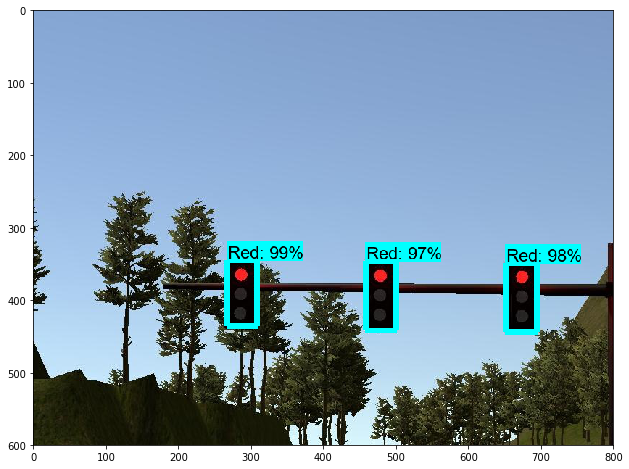

SCORES
[0.99456304 0.9857836  0.01670955 0.00825323 0.00792012 0.00746307
 0.00575945 0.00568982 0.00562877 0.00540953]
CLASSES
[2. 2. 2. 2. 2. 3. 4. 2. 4. 4.]


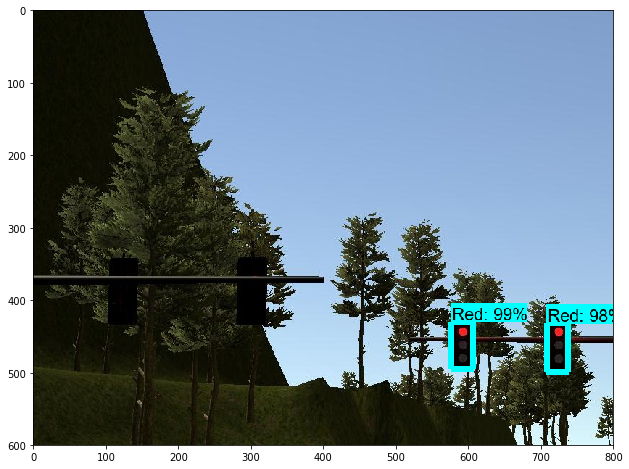

SCORES
[0.96766037 0.9539423  0.84993434 0.01086156 0.00610147 0.00595373
 0.00564918 0.00503607 0.00498594 0.00458854]
CLASSES
[2. 2. 2. 1. 2. 1. 2. 2. 1. 2.]


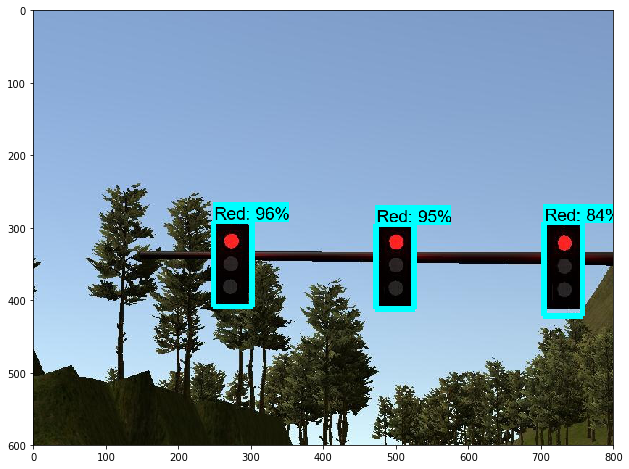

SCORES
[0.97298944 0.90001124 0.8020925  0.0992586  0.0847142  0.04822064
 0.01529681 0.00958059 0.00780646 0.00772744]
CLASSES
[2. 2. 2. 2. 1. 2. 2. 2. 2. 2.]


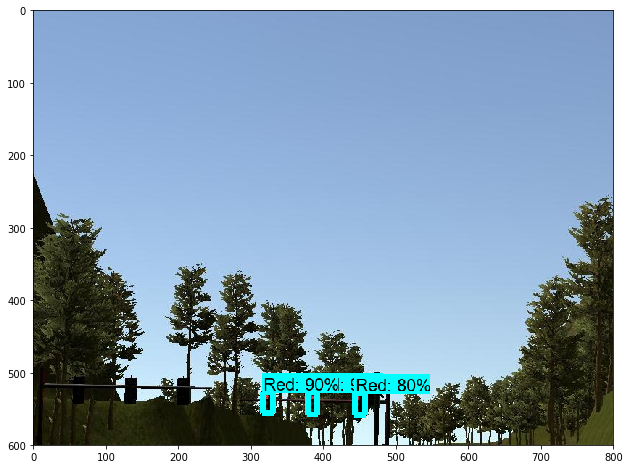

SCORES
[0.9590052  0.645119   0.5315586  0.00640221 0.00527512 0.00514087
 0.00511594 0.00508346 0.00486063 0.0046708 ]
CLASSES
[2. 2. 2. 1. 1. 3. 4. 2. 1. 4.]


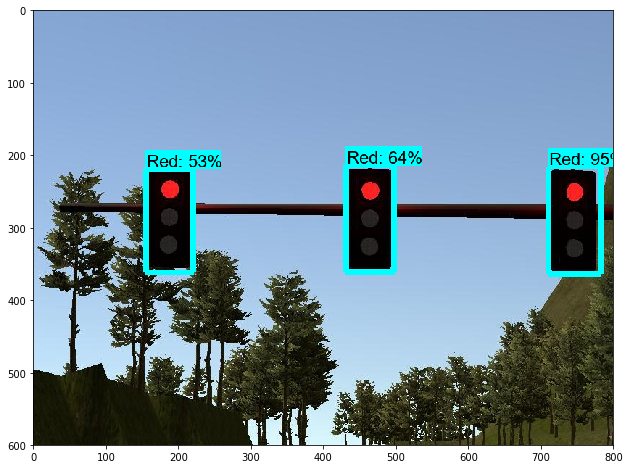

In [11]:
PATH_TO_IMGS = r'data/simulator_dataset_rgb'
subfolder = ['Green', 'Red', 'Yellow', 'Unknown']
TEST_IMGS = []
for i in subfolder:
    TEST_IMGS += glob(os.path.join(os.path.join(PATH_TO_IMGS, i), r'*.jpg'))
random.shuffle(TEST_IMGS)

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detect_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detect_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detect_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMGS):
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            print('SCORES')
            print(scores[0])
            print('CLASSES')
            print(classes[0])
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                line_thickness=8)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()
            
            if idx == 10:
                break

In [12]:
# Model - Faster RCNN Inception V2 Coco - 10000 steps
PATH_TO_GRAPH = r'models/faster_rcnn_inception_v2_coco_2018_01_28/frozen_inference_graph.pb' ## load RCNN trained on udacity's simulator images
detection_graph = load_graph(PATH_TO_GRAPH)

In [13]:
# Test on real data from udacity testing parking lot.
PATH_TO_IMGS = r'data/udacity_testarea_rgb'
TEST_IMGS = glob(os.path.join(PATH_TO_IMGS, r'*.jpg'))
random.shuffle(TEST_IMGS)

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detect_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detect_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detect_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMGS):
            random.shuffle(TEST_IMGS)
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            print('SCORES')
            print(scores[0])
            print('CLASSES')
            print(classes[0])
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                line_thickness=8)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()
            
            if idx == 10:
                break

InternalError: cuDNN launch failure : input shape([1,576,69,86]) filter shape([3,3,576,512])
	 [[Node: Conv/Conv2D = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](FirstStageFeatureExtractor/InceptionV2/InceptionV2/Mixed_4e/concat, Conv/weights)]]
	 [[Node: SecondStagePostprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/Minimum/_165 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_2088_SecondStagePostprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/Minimum", tensor_type=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"](^_cloopSecondStagePostprocessor/BatchMultiClassNonMaxSuppression/map/while/strided_slice/stack_1/_11)]]

Caused by op 'Conv/Conv2D', defined at:
  File "C:\Users\htang\AppData\Local\conda\conda\envs\tf-gpu\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\htang\AppData\Local\conda\conda\envs\tf-gpu\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\htang\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\htang\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\htang\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\Users\htang\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\tornado\platform\asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\htang\AppData\Local\conda\conda\envs\tf-gpu\lib\asyncio\base_events.py", line 438, in run_forever
    self._run_once()
  File "C:\Users\htang\AppData\Local\conda\conda\envs\tf-gpu\lib\asyncio\base_events.py", line 1451, in _run_once
    handle._run()
  File "C:\Users\htang\AppData\Local\conda\conda\envs\tf-gpu\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\htang\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\tornado\ioloop.py", line 758, in _run_callback
    ret = callback()
  File "C:\Users\htang\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\tornado\stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\htang\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\tornado\gen.py", line 1233, in inner
    self.run()
  File "C:\Users\htang\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\tornado\gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "C:\Users\htang\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\htang\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\Users\htang\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\htang\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\Users\htang\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\htang\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\Users\htang\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\htang\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\htang\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\htang\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "C:\Users\htang\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\htang\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\htang\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "C:\Users\htang\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-fa5ceabd5b27>", line 3, in <module>
    detection_graph = load_graph(PATH_TO_GRAPH)
  File "<ipython-input-2-73bbf786c8af>", line 9, in load_graph
    tf.import_graph_def(od_graph_def, name='')
  File "C:\Users\htang\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\importer.py", line 313, in import_graph_def
    op_def=op_def)
  File "C:\Users\htang\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\ops.py", line 2956, in create_op
    op_def=op_def)
  File "C:\Users\htang\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InternalError (see above for traceback): cuDNN launch failure : input shape([1,576,69,86]) filter shape([3,3,576,512])
	 [[Node: Conv/Conv2D = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](FirstStageFeatureExtractor/InceptionV2/InceptionV2/Mixed_4e/concat, Conv/weights)]]
	 [[Node: SecondStagePostprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/Minimum/_165 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_2088_SecondStagePostprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/Minimum", tensor_type=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"](^_cloopSecondStagePostprocessor/BatchMultiClassNonMaxSuppression/map/while/strided_slice/stack_1/_11)]]


In [14]:
# Test on udacity simulator data
PATH_TO_IMGS = r'data/simulator_dataset_rgb'
subfolder = ['Green', 'Red', 'Yellow', 'Unknown']
TEST_IMGS = []
for i in subfolder:
    TEST_IMGS += glob(os.path.join(os.path.join(PATH_TO_IMGS, i), r'*.jpg'))
random.shuffle(TEST_IMGS)

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detect_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detect_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detect_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMGS):
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            print('SCORES')
            print(scores[0])
            print('CLASSES')
            print(classes[0])
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                line_thickness=8)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()
            
            if idx == 10:
                break

InternalError: Failed to create session.